# Lecture 3 Sector-coupling

## PV, CHP, Bio, Natural-gas, District heating

### 1)Import Packages

In [1]:
import pypsa
import pandapower as pp
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import warnings
import subprocess
from shapely.errors import ShapelyDeprecationWarning
import logging

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
logging.getLogger("pypsa.pf").setLevel(logging.WARNING)
plt.rc("figure", figsize=(10, 8))

c:\Users\moino\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\moino\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\moino\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


### 2)Create a network and set Snapshots

In [2]:
# Create a new PyPSA network
network = pypsa.Network()
network.set_snapshots(range(1))  # Solve for a year 365*24
solver='highs'

### 3)Add Buses

In [16]:
bus= pd.read_csv('buses.csv')
network.madd(
     "Bus",
    names= bus.bus,
    v_nom=list(bus.v_nom),
    carrier=list(bus.carrier),
    #x=list(bus.x),
    #y=list(bus.y),
)
network.buses

C:\Users\moino\AppData\Local\Temp\ipykernel_21680\3723140723.py:2: DeprecatedWarning:

madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.



v_nom type    x    y  \
Bus                                                                         
150_kV_Enstedvrket                                  2200.0       0.0  0.0   
202                                                 2200.0       0.0  0.0   
220_kV-Umspannwerk_Birkenfeld                       2200.0       0.0  0.0   
220-kV-Umspannwerk_Eichstetten1                     2200.0       0.0  0.0   
220-kV-Umspannwerk_Eichstetten                      3800.0       0.0  0.0   
220-kV-Umspannwerk_Kuppenheim                       2200.0       0.0  0.0   
302_Marzahn_-_Thyrow                                2200.0       0.0  0.0   
316                                                 2200.0       0.0  0.0   
380kV_Hengelo                                       3800.0       0.0  0.0   
380kV_Maasbracht                                    3800.0       0.0  0.0   
380kV_Meeden                                        3800.0       0.0  0.0   
380-kV-Umspannwerk_Eichstetten                      3800.0       0.0  0.0   
380-kV-Umspannwerk_Grossgartach1                    2200.0       0.0  0.0   
380-kV-Umspannwerk_Grossgartach                     3800.0       0.0  0.0   
380kV-Umspannwerk_Gruenkraut                        3800.0       0.0  0.0   
380kV-Umspannwerk_Pulverdingen1                     2200.0       0.0  0.0   
380kV-Umspannwerk_Pulverdingen                      3800.0       0.0  0.0   
400_kV_Kass                                         2200.0       0.0  0.0   
415                                                 3800.0       0.0  0.0   
Abbenfleth                                          2200.0       0.0  0.0   
abc                                                 2200.0       0.0  0.0   
Alfstedt                                            3800.0       0.0  0.0   
Algermissen                                         3800.0       0.0  0.0   
Amelsbueren1                                        2200.0       0.0  0.0   
Amelsbueren                                         2200.0       0.0  0.0   
APG_Umspannwerk_Westtiro1l                          2200.0       0.0  0.0   
APG_Umspannwerk_Westtirol                           3800.0       0.0  0.0   
Asphard                                             3800.0       0.0  0.0   
Atlantic                                            2200.0       0.0  0.0   
Audorf2                                             2200.0       0.0  0.0   
Audorf1                                             3800.0       0.0  0.0   
Audorf                                              3800.0       0.0  0.0   
Audorf_-_Jardelund                                  3800.0       0.0  0.0   
BASF                                                2200.0       0.0  0.0   
Beerfelden                                          2200.0       0.0  0.0   
Benteler_Stahlwerk1                                 2200.0       0.0  0.0   
Benteler_Stahlwerk                                  3800.0       0.0  0.0   
Bentwisch1                                          2200.0       0.0  0.0   
Bentwisch_HGue                                      3800.0       0.0  0.0   
Berlin/Mitte                                        3800.0       0.0  0.0   
Bertikow                                            2200.0       0.0  0.0   
Betznau1                                            2200.0       0.0  0.0   
Betznau                                             3800.0       0.0  0.0   
Beuren                                              2200.0       0.0  0.0   
Bocklemuend                                         2200.0       0.0  0.0   
Brandenburg-West                                    2200.0       0.0  0.0   
Brokdorf1                                           2200.0       0.0  0.0   
Brokdorf                                            3800.0       0.0  0.0   
Buehl                                               2200.0       0.0  0.0   
Bus_e_1                                             2200.0       0.0  0.0   
Bus_e_10                                         

### 4)Add generators

In [27]:
# Read excel file which contains Non renewable generators data
generators=pd.read_csv('generators.csv',header=0)
network.madd(
    "Generator",
    names= generators.generator,
    bus=list(generators.bus),
    carrier=list(generators.carrier),
    p_nom=list(generators.p_nom),
    #p_nom_extendable=list(generators.p_nom_extendable),
    marginal_cost=list(generators.marginal_cost),
    #efficiency=list(generators.efficiency)
) 
network.generators

C:\Users\moino\AppData\Local\Temp\ipykernel_21680\426030607.py:3: DeprecatedWarning:

madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.



bus control type         p_nom  p_nom_mod  \
Generator                                                                 
1_Gas                           1      PQ       1.210000e+02        0.0   
1_Hard_Coal                     1      PQ       2.720000e+02        0.0   
102_Gas                       102      PQ       6.790000e+01        0.0   
108_Run_of_River              108      PQ       6.310000e+01        0.0   
108_Waste                     108      PQ       3.800000e+01        0.0   
111_Gas                       111      PQ       1.350000e+01        0.0   
112_Gas                       112      PQ       1.350000e+01        0.0   
112_Run_of_River              112      PQ       1.110000e+01        0.0   
114_Hard_Coal                 114      PQ       1.900000e+01        0.0   
115_Brown_Coal                115      PQ       4.730000e+03        0.0   
116_Gas                       116      PQ       5.433000e+02        0.0   
118_Gas                       118      PQ       9.500000e+01        0.0   
118_Waste                     118      PQ       1.200000e+01        0.0   
119_Brown_Coal                119      PQ       9.300000e+00        0.0   
119_Gas                       119      PQ       1.690000e+01        0.0   
119_Hard_Coal                 119      PQ       6.150000e+01        0.0   
121_Brown_Coal                121      PQ       2.460000e+01        0.0   
123_220kV_Brown_Coal    123_220kV      PQ       3.455000e+03        0.0   
123_220kV_Gas           123_220kV      PQ       9.650000e+01        0.0   
126_Gas                       126      PQ       2.000000e+00        0.0   
126_Oil                       126      PQ       6.000000e+01        0.0   
127_Brown_Coal                127      PQ       1.800000e+03        0.0   
127_Waste                     127      PQ       2.400000e+01        0.0   
128_220kV_Run_of_River  128_220kV      PQ       3.640000e+01        0.0   
129_220kV_Hard_Coal     129_220kV      PQ       6.150000e+01        0.0   
12_220kV_Gas             12_220kV      PQ       1.500000e+02        0.0   
12_220kV_Waste           12_220kV      PQ       3.000000e+01        0.0   
130_Hard_Coal                 130      PQ       8.500000e+01        0.0   
130_Waste                     130      PQ       3.000000e+01        0.0   
131_Gas                       131      PQ       5.863000e+02        0.0   
132_Storage_Hydro             132      PQ       2.900000e+01        0.0   
133_Brown_Coal                133      PQ       1.370000e+02        0.0   
133_Waste                     133      PQ       3.340000e+01        0.0   
134_Brown_Coal                134      PQ       1.180000e+02        0.0   
136_Gas                       136      PQ       8.380000e+02        0.0   
136_Hard_Coal                 136      PQ       7.650000e+02        0.0   
137_Gas                       137      PQ       1.140000e+01        0.0   
139_Hard_Coal                 139      PQ       7.600000e+02        0.0   
14_Run_of_River                14      PQ       2.700000e+01        0.0   
140_Gas                       140      PQ       1.110000e+01        0.0   
141_Gas                       141      PQ       6.470000e+01        0.0   
142_Gas                       142      PQ       9.800000e+00        0.0   
142_Hard_Coal                 142      PQ       4.490000e+02        0.0   
145_Brown_Coal                145      PQ       7.530000e+01        0.0   
145_Gas                       145      PQ       5.365000e+02        0.0   
145_Other                     145      PQ       7.980000e+01        0.0   
145_Waste                     145      PQ       4.510000e+01        0.0   
146_Gas                       146      PQ       8.400000e+01        0.0   
147_Gas                       147      PQ       2.300000e+02        0.0   
148_Gas                       148      PQ       1.020000e+01        0.0   
148_Oil                       148      PQ       8.620000e+01        0.0   
148_Waste                     148      PQ       5.37000

### 5)Add load

In [29]:
# Read excel file which contains Non renewable generators data
load=pd.read_csv('loads.csv',header=0)
network.madd(
    "Load",
    names= load.bus,
    bus=list(load.bus),
    #p_set=list(load.p_set),
)
network.loads

C:\Users\moino\AppData\Local\Temp\ipykernel_21680\2355247660.py:3: DeprecatedWarning:

madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.



bus carrier type  p_set  q_set  sign  active
Load                                                         
1                  1                 0.0    0.0  -1.0    True
3                  3                 0.0    0.0  -1.0    True
4                  4                 0.0    0.0  -1.0    True
6                  6                 0.0    0.0  -1.0    True
7                  7                 0.0    0.0  -1.0    True
8                  8                 0.0    0.0  -1.0    True
9                  9                 0.0    0.0  -1.0    True
11                11                 0.0    0.0  -1.0    True
14                14                 0.0    0.0  -1.0    True
16                16                 0.0    0.0  -1.0    True
17                17                 0.0    0.0  -1.0    True
19                19                 0.0    0.0  -1.0    True
21                21                 0.0    0.0  -1.0    True
23                23                 0.0    0.0  -1.0    True
25                25                 0.0    0.0  -1.0    True
27                27                 0.0    0.0  -1.0    True
28                28                 0.0    0.0  -1.0    True
29                29                 0.0    0.0  -1.0    True
31                31                 0.0    0.0  -1.0    True
33                33                 0.0    0.0  -1.0    True
34                34                 0.0    0.0  -1.0    True
35                35                 0.0    0.0  -1.0    True
36                36                 0.0    0.0  -1.0    True
38                38                 0.0    0.0  -1.0    True
39                39                 0.0    0.0  -1.0    True
40                40                 0.0    0.0  -1.0    True
41                41                 0.0    0.0  -1.0    True
43                43                 0.0    0.0  -1.0    True
44                44                 0.0    0.0  -1.0    True
45                45                 0.0    0.0  -1.0    True
47                47                 0.0    0.0  -1.0    True
48                48                 0.0    0.0  -1.0    True
49                49                 0.0    0.0  -1.0    True
50                50                 0.0    0.0  -1.0    True
51                51                 0.0    0.0  -1.0    True
53                53                 0.0    0.0  -1.0    True
54                54                 0.0    0.0  -1.0    True
55                55                 0.0    0.0  -1.0    True
57                57                 0.0    0.0  -1.0    True
58                58                 0.0    0.0  -1.0    True
59                59                 0.0    0.0  -1.0    True
60                60                 0.0    0.0  -1.0    True
62                62                 0.0    0.0  -1.0    True
63                63                 0.0    0.0  -1.0    True
64                64                 0.0    0.0  -1.0    True
65                65                 0.0    0.0  -1.0    True
66                66                 0.0    0.0  -1.0    True
67                67                 0.0    0.0  -1.0    True
70                70                 0.0    0.0  -1.0    True
71                71                 0.0    0.0  -1.0    True
72                72                 0.0    0.0  -1.0    True
73                73                 0.0    0.0  -1.0    True
75                75                 0.0    0.0  -1.0    True
76                76                 0.0    0.0  -1.0    True
77                77                 0.0    0.0  -1.0    True
79                79                 0.0    0.0  -1.0    True
80                80                 0.0    0.0  -1.0    True
81                81                 0.0    0.0  -1.0    True
82                82                 0.0    0.0  -1.0    True
83                83                 0.0    0.0  -1.0    True
84                84                 0.0    0.0  -1.0    True
85                85                 0.0    0.0  -1.0    True
88                88                 0.0    0.0  

### 6)Add links

In [38]:
links = pd.read_csv('links.csv', header=0)
network.madd(
    "Link",
    names=links.name,
    bus0=list(links.bus0),
    bus1=list(links.bus1),
    #bus2=list(links.bus2),
    #p_nom=list(links.p_nom),
    #p_nom_extendable=list(links.p_nom_extendable),
    #efficiency=list(links.efficiency),
    #efficiency2=list(links.efficiency2),
    #capital_cost=list(links.capital_cost),
)
network.links

C:\Users\moino\AppData\Local\Temp\ipykernel_21680\4268477592.py:2: DeprecatedWarning:

madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.



bus0       bus1 type carrier  efficiency  active  build_year  \
Link                                                                      
1             1    2_220kV                      1.0    True           0   
2             3          4                      1.0    True           0   
3       5_220kV          6                      1.0    True           0   
4             7          5                      1.0    True           0   
5             8          9                      1.0    True           0   
6      10_220kV         11                      1.0    True           0   
7            11   12_220kV                      1.0    True           0   
8      10_220kV   12_220kV                      1.0    True           0   
9      13_220kV         14                      1.0    True           0   
10           13         15                      1.0    True           0   
11           16          5                      1.0    True           0   
12           17         18                      1.0    True           0   
13           17         12                      1.0    True           0   
14           13         15                      1.0    True           0   
15           14   15_220kV                      1.0    True           0   
16     13_220kV         19                      1.0    True           0   
17           20         21                      1.0    True           0   
18           20         22                      1.0    True           0   
19     20_220kV         23                      1.0    True           0   
20           23   24_220kV                      1.0    True           0   
21           25         26                      1.0    True           0   
22           25         22                      1.0    True           0   
23           23         27                      1.0    True           0   
24           28         23                      1.0    True           0   
25            8         21                      1.0    True           0   
26            9         29                      1.0    True           0   
27           30         25                      1.0    True           0   
28           31         32                      1.0    True           0   
29           32         33                      1.0    True           0   
30           34         35                      1.0    True           0   
31           35         36                      1.0    True           0   
32      2_220kV          6                      1.0    True           0   
33           37         10                      1.0    True           0   
34           10         38                      1.0    True           0   
35           37         38                      1.0    True           0   
36           39         40                      1.0    True           0   
37           39         41                      1.0    True           0   
38           42         41                      1.0    True           0   
39           18         42                      1.0    True           0   
40     10_220kV         43                      1.0    True           0   
41     10_220kV         43                      1.0    True           0   
42           44         45                      1.0    True           0   
43           44   46_220kV                      1.0    True           0   
44           46         12                      1.0    True           0   
45           46         12                      1.0    True           0   
46           47         48                      1.0    True           0   
47           49         50                      1.0    True           0   
48           31         33                      1.0    True           0   
49           31         51                      1.0    True           0   
50           52         53                      1.0    True           0   
51           52         54                      1.0    True           0   
52     52_220kV         55          

### 7)Add carriers

In [121]:
carriers = pd.read_csv('carrier.csv', header=0)
network.madd(
    "Carrier",
    names=carriers.carrier,
    co2_emissions=list(carriers.co2_emissions),
    nice_name=list(carriers.carrier),
)

Index(['gas', 'coal', 'wind', 'biomass'], dtype='object', name='carrier')

### 8)Storages

In [39]:
stores = pd.read_csv('stores.csv', header=0)
network.madd(
    "Store",
    names=stores.name,
    #e_initial=list(stores.e_initial),
    #e_nom=list(stores.e_nom),
    marginal_cost=list(stores.marginal_cost),
    bus=list(stores.bus),
    #e_cyclic=list(stores.e_cyclic),
    #e_nom_extendable=list(stores.e_nom_extendable),
)
network.stores

C:\Users\moino\AppData\Local\Temp\ipykernel_21680\1283937981.py:2: DeprecatedWarning:

madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.



bus type           carrier  e_nom  e_nom_mod  \
Store                                                                        
100_220kV Pumped Hydro  100_220kV             substation    0.0        0.0   
114 Pumped Hydro              114             substation    0.0        0.0   
121 Pumped Hydro              121                  plant    0.0        0.0   
140 Pumped Hydro              140             substation    0.0        0.0   
141 Pumped Hydro              141             substation    0.0        0.0   
158 Pumped Hydro              158             substation    0.0        0.0   
166 Pumped Hydro              166              generator    0.0        0.0   
205 Pumped Hydro              205                  plant    0.0        0.0   
228 Pumped Hydro              228             substation    0.0        0.0   
235 Pumped Hydro              235             substation    0.0        0.0   
25 Pumped Hydro                25             substation    0.0        0.0   
266 Pumped Hydro              266             substation    0.0        0.0   
268 Pumped Hydro              268             substation    0.0        0.0   
279_220kV Pumped Hydro  279_220kV             substation    0.0        0.0   
293 Pumped Hydro              293                  plant    0.0        0.0   
320 Pumped Hydro              320             substation    0.0        0.0   
32_220kV Pumped Hydro    32_220kV             substation    0.0        0.0   
333 Pumped Hydro              333             substation    0.0        0.0   
342 Pumped Hydro              342             substation    0.0        0.0   
343 Pumped Hydro              343             substation    0.0        0.0   
362_220kV Pumped Hydro  362_220kV             substation    0.0        0.0   
368 Pumped Hydro              368              generator    0.0        0.0   
374 Pumped Hydro              374             substation    0.0        0.0   
379 Pumped Hydro              379             substation    0.0        0.0   
389 Pumped Hydro              389             substation    0.0        0.0   
397 Pumped Hydro              397             substation    0.0        0.0   
423 Pumped Hydro              423              generator    0.0        0.0   
424 Pumped Hydro              424             substation    0.0        0.0   
479 Pumped Hydro              479             substation    0.0        0.0   
481 Pumped Hydro              481       auxillary_T_node    0.0        0.0   
493 Pumped Hydro              493             substation    0.0        0.0   
51 Pumped Hydro                51             substation    0.0        0.0   
63 Pumped Hydro                63             substation    0.0        0.0   
66 Pumped Hydro                66             substation    0.0        0.0   
72 Pumped Hydro                72             substation    0.0        0.0   
78_220kV Pumped Hydro    78_220kV             substation    0.0        0.0   
8 Pumped Hydro                  8             substation    0.0        0.0   
98 Pumped Hydro                98             substation    0.0        0.0   

                        e_nom_extendable  e_nom_min  e_nom_max  e_min_pu  \
Store                                                                      
100_220kV Pumped Hydro             False        0.0        inf       0.0   
114 Pumped Hydro                   False        0.0        inf       0.0   
121 Pumped Hydro                   False        0.0        inf       0.0   
140 Pumped Hydro                   False        0.0        inf       0.0   
141 Pumped Hydro                   False        0.0        inf       0.0   
158 Pumped Hydro                   False        0.0        inf       0.0   
166 Pumped Hydro                   False        0.0        inf       0.0   
205 Pumped Hydro                   False        0.0        inf       0.0   
228 Pumped Hydro                   False        0.0        inf       0.0   
235 Pumped Hydro                   False        0.0        inf       0.0 

storage_units = pd.read_csv('storage_units.csv', header=0)
network.madd(
    "Storage_units",
    names=stores.name,
    e_initial=list(stores.e_initial),
    e_nom=list(stores.e_nom),
    marginal_cost=list(stores.marginal_cost),
    bus=list(stores.bus),
    e_cyclic=list(stores.e_cyclic),
    e_nom_extendable=list(stores.e_nom_extendable),
)
network.stores

### 9)Global constraints

In [40]:
network.add("GlobalConstraint", "co2_limit", sense="<=", constant=10000.0)

Index(['co2_limit'], dtype='object')

In [41]:
network.optimize()

Index(['150_kV_Enstedvrket', '202', '220_kV-Umspannwerk_Birkenfeld',
       '220-kV-Umspannwerk_Eichstetten1', '220-kV-Umspannwerk_Eichstetten',
       '220-kV-Umspannwerk_Kuppenheim', '302_Marzahn_-_Thyrow', '316',
       '380kV_Hengelo', '380kV_Maasbracht',
       ...
       '382_220kV', '384_220kV', '385_220kV', '391_220kV', '403_220kV',
       '404_220kV', '413_220kV', '421_220kV', '450_220kV', '458_220kV'],
      dtype='object', name='Bus', length=1167)
Index(['1_Gas', '1_Hard_Coal', '102_Gas', '108_Run_of_River', '108_Waste',
       '111_Gas', '112_Gas', '112_Run_of_River', '114_Hard_Coal',
       '115_Brown_Coal',
       ...
       '382_220kV_Solar', '384_220kV_Solar', '385_220kV_Solar',
       '391_220kV_Solar', '403_220kV_Solar', '404_220kV_Solar',
       '413_220kV_Solar', '421_220kV_Solar', '450_220kV_Solar',
       '458_220kV_Solar'],
      dtype='object', name='Generator', length=1423)
Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '850', '851'

('ok', 'optimal')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


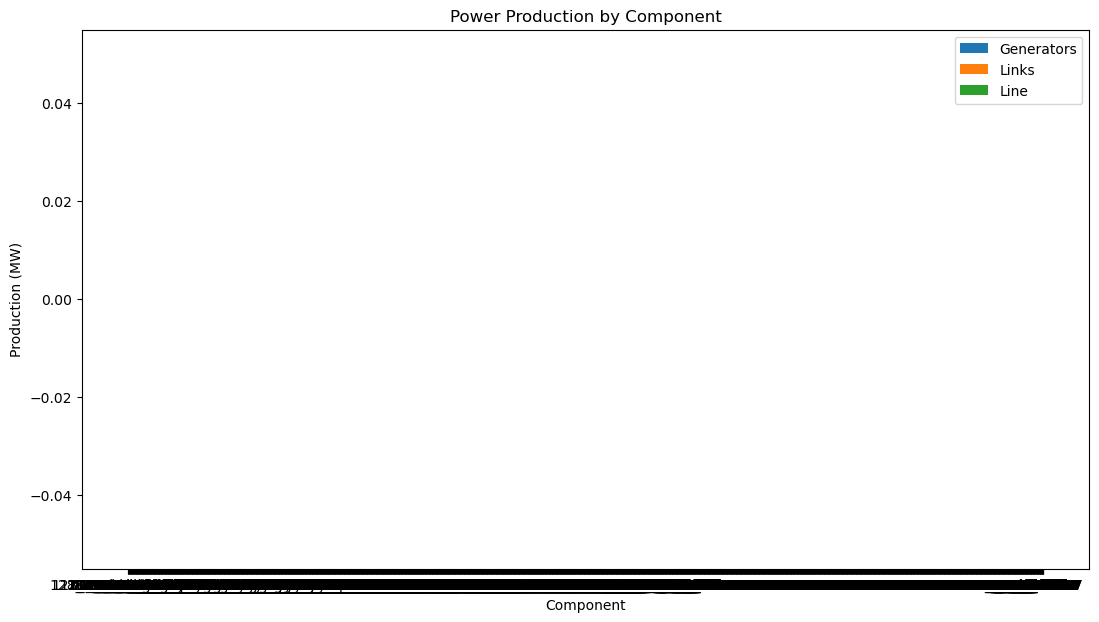

In [42]:
# Your DataFrame df
df = pd.concat([network.generators_t.p.loc[0],
        network.links_t.p0.loc[0],
        network.loads_t.p.loc[0],
    ],
    keys=["Generators", "Links", "Line"],
    names=["Component", "index"],
).reset_index(name="Production")

# Plotting using PyPSA
fig, ax = plt.subplots(figsize=(13, 7))

# Plot generators
df_generators = df[df["Component"] == "Generators"]
ax.bar(df_generators["index"], df_generators["Production"], label="Generators")

# Plot links
df_links = df[df["Component"] == "Links"]
ax.bar(df_links["index"], df_links["Production"], label="Links")

# Plot loads
df_loads = df[df["Component"] == "Line"]
ax.bar(df_loads["index"], df_loads["Production"], label="Line")

# Customize the plot
ax.set_xlabel("Component")
ax.set_ylabel("Production (MW)")
ax.set_title("Power Production by Component")
ax.legend()

# Show the plot
plt.show()
